In [1]:
import os
import csv
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

"""
### 합성 데이터 생성

year = "2020"
List=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
List_index = 2 ### 2020-01-01은 수요일. index 커지면서 요일 변경됨.
arrival = 13 ### 1시로 입장 시간 초기화
departure = 18 ### 6시로 퇴장 시간 초기화

hehehe=0### 월별로 변수를 만들어볼 거야 이번엔. 3,9월은 좀 늦게 입/퇴장한다.

fname = 'C:/Users/ASUS/Music/SyntheticData'
f = open(fname + '.csv', 'w')
wr = csv.writer(f)

### 1행에 항목 적어두기

f.write("Date")
f.write(',')
f.write("Day")
f.write(',')
f.write("Arrival")
f.write(',')
f.write("Departure")
f.write('\n')

for month in range (1,13): ### 1월부터 12월까지
    if month == 2:
        day_end = 28
    elif month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        day_end = 31
    elif month==4 or month==6 or month==9 or month==11:
        day_end = 30
    day = 1 + random.randint(0,5)
    while day < day_end + 1:
        if month < 10 and day < 10:
            string = str.format("{}-0{}-0{}",year,month,day)
        elif month < 10 and day >= 10:
            string = str.format("{}-0{}-{}",year,month,day)
        elif month >= 10 and day < 10:
            string = str.format("{}-{}-0{}",year,month,day)
        else:
            string = str.format("{}-{}-{}",year,month,day) ### 날짜 데이터 형식 맞추기
        ### 월요일, 목요일은 늦게 출/퇴근함
        if List_index == 0:
            arrival=arrival+3
            departure=departure+3
        if List_index == 3:
            arrival=arrival+2
            departure=departure+2
        if month == 3 or month ==7:
            hehehe = 1
        else:
            hehehe = 0
        f.write(string)
        f.write(',')
        f.write(List[List_index])
        f.write(',')
        f.write(str(arrival+hehehe))
        f.write(',')
        f.write(str(departure+hehehe))
        f.write('\n')
        List_index=(List_index+1)%7
        arrival=13
        departure=18
        arrival=arrival+(random.randint(-25,30)/35) ### 입장 시간에 랜덤성 부여
        departure=departure+(random.randint(-30,25)/35) ### 퇴장 시간에 랜덤성 부여
        
        day = day + random.randint(0,5) ### 랜덤한 날에 기록됨

f.close()
"""

'\n### 합성 데이터 생성\n\nyear = "2020"\nList=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]\nList_index = 2 ### 2020-01-01은 수요일. index 커지면서 요일 변경됨.\narrival = 13 ### 1시로 입장 시간 초기화\ndeparture = 18 ### 6시로 퇴장 시간 초기화\n\nhehehe=0### 월별로 변수를 만들어볼 거야 이번엔. 3,9월은 좀 늦게 입/퇴장한다.\n\nfname = \'C:/Users/ASUS/Music/SyntheticData\'\nf = open(fname + \'.csv\', \'w\')\nwr = csv.writer(f)\n\n### 1행에 항목 적어두기\n\nf.write("Date")\nf.write(\',\')\nf.write("Day")\nf.write(\',\')\nf.write("Arrival")\nf.write(\',\')\nf.write("Departure")\nf.write(\'\n\')\n\nfor month in range (1,13): ### 1월부터 12월까지\n    if month == 2:\n        day_end = 28\n    elif month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:\n        day_end = 31\n    elif month==4 or month==6 or month==9 or month==11:\n        day_end = 30\n    day = 1 + random.randint(0,5)\n    while day < day_end + 1:\n        if month < 10 and day < 10:\n            string = str.format("{}-0{}-0{}",year,month,day)\n        elif month < 

In [2]:
ulala = pd.read_csv("C:/Users/ASUS/Music/LDS/anomaly(0)_ljs.csv")
ulala.head(5)

,Date,Arrival,Departure
0,2013-05-31,13.312778,17.035278
1,2013-06-02,19.008333,19.290833
2,2013-06-03,12.508889,19.855833
3,2013-06-04,10.797778,17.164167
4,2013-06-05,10.842222,13.213333


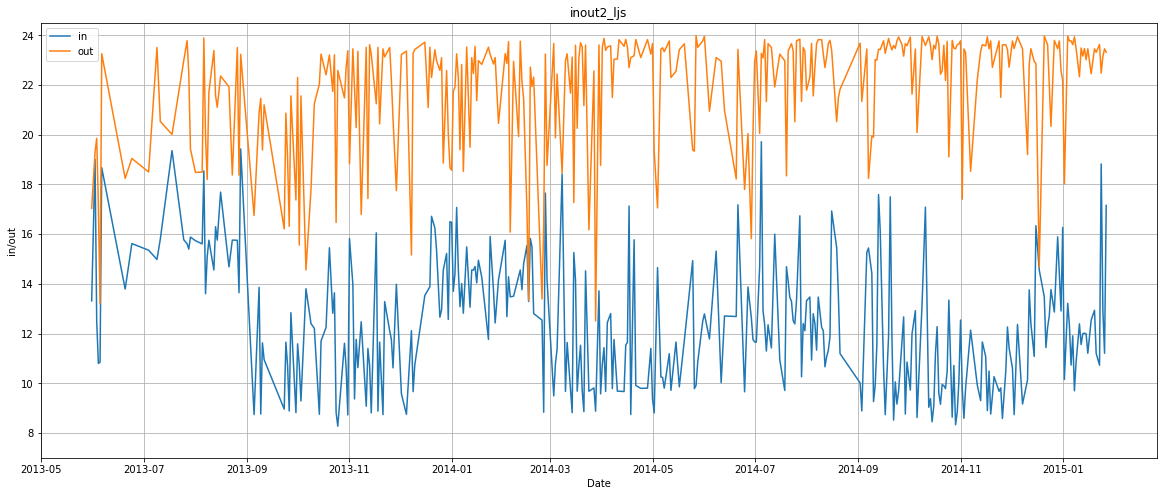

In [3]:
ulala["Date"] = pd.to_datetime(ulala["Date"])
#ulala["Arrival"] = pd.to_datetime(ulala["Arrival"])

plt.figure(figsize=(20,8))
plt.plot(ulala.Date,ulala.Arrival)
plt.plot(ulala.Date,ulala.Departure)
plt.title("inout2_ljs")
plt.xlabel("Date")
plt.ylabel("in/out")
plt.ylim(7,24.5)
plt.grid()
plt.legend(['in','out'])
plt.show()

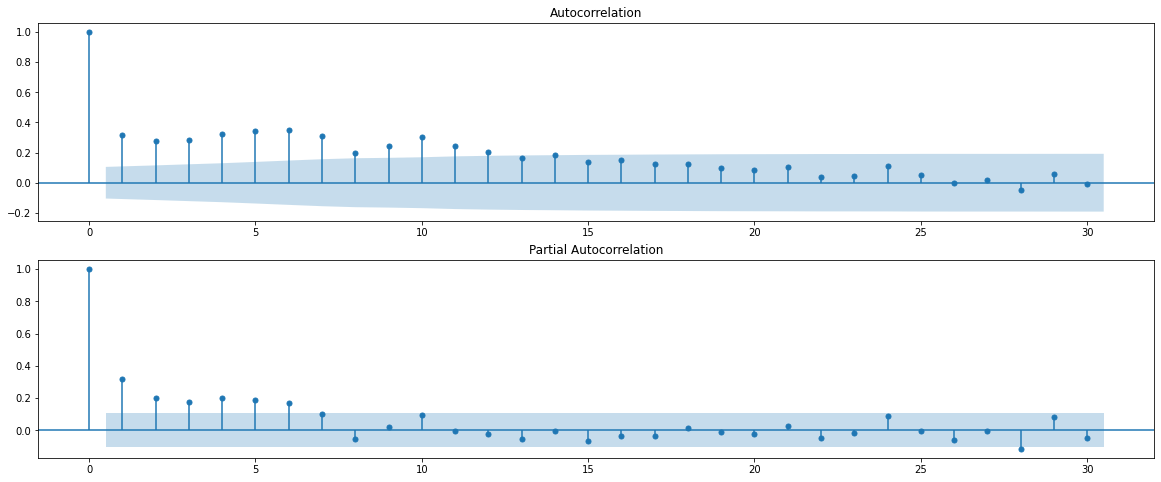

In [4]:
import statsmodels.api as sm

timeSeriesA = ulala.loc[:, ["Date","Arrival"]] ### 입장 시간
timeSeriesA.index = timeSeriesA.Date
tsA = timeSeriesA.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA, lags=30, ax=ax1) ### 그래프를 보면 7일 단위로 자기상관이 높음
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA, lags=30, ax=ax2)

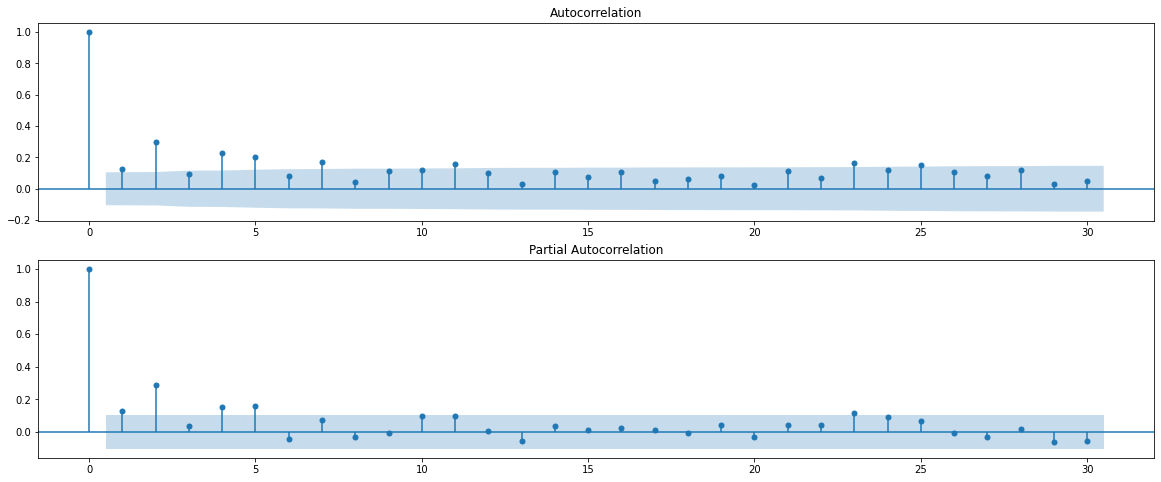

In [5]:
timeSeriesD = ulala.loc[:, ["Date","Departure"]] ### 퇴장 시간
timeSeriesD.index = timeSeriesD.Date
tsD = timeSeriesD.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsD, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsD, lags=30, ax=ax2)

<Figure size 432x288 with 0 Axes>

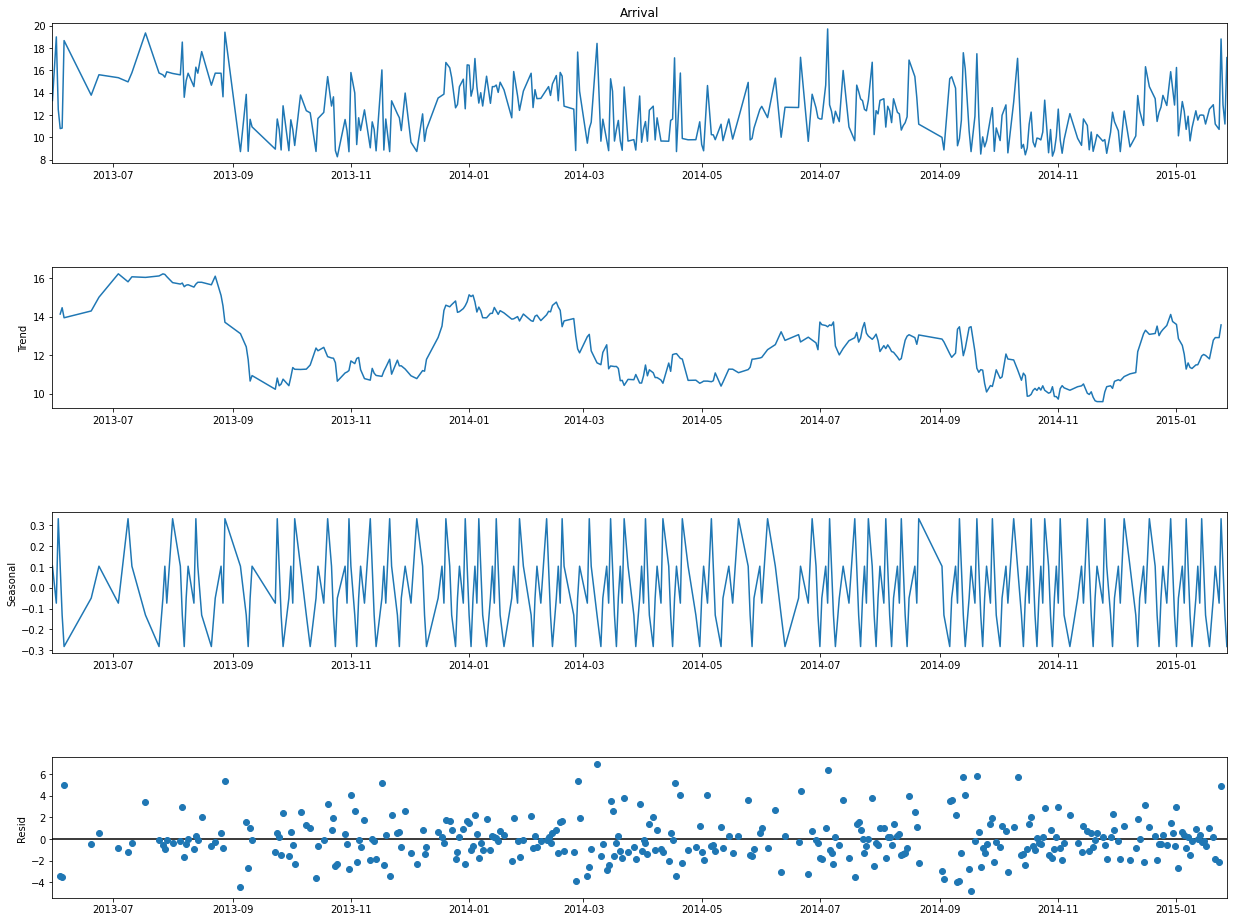

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultA = seasonal_decompose(tsA['Arrival'], model='additive',period=7) ### 7일 단위로 보면 seasonal함

fig = plt.figure()
fig = resultA.plot()
fig.set_size_inches(20, 15)

<Figure size 432x288 with 0 Axes>

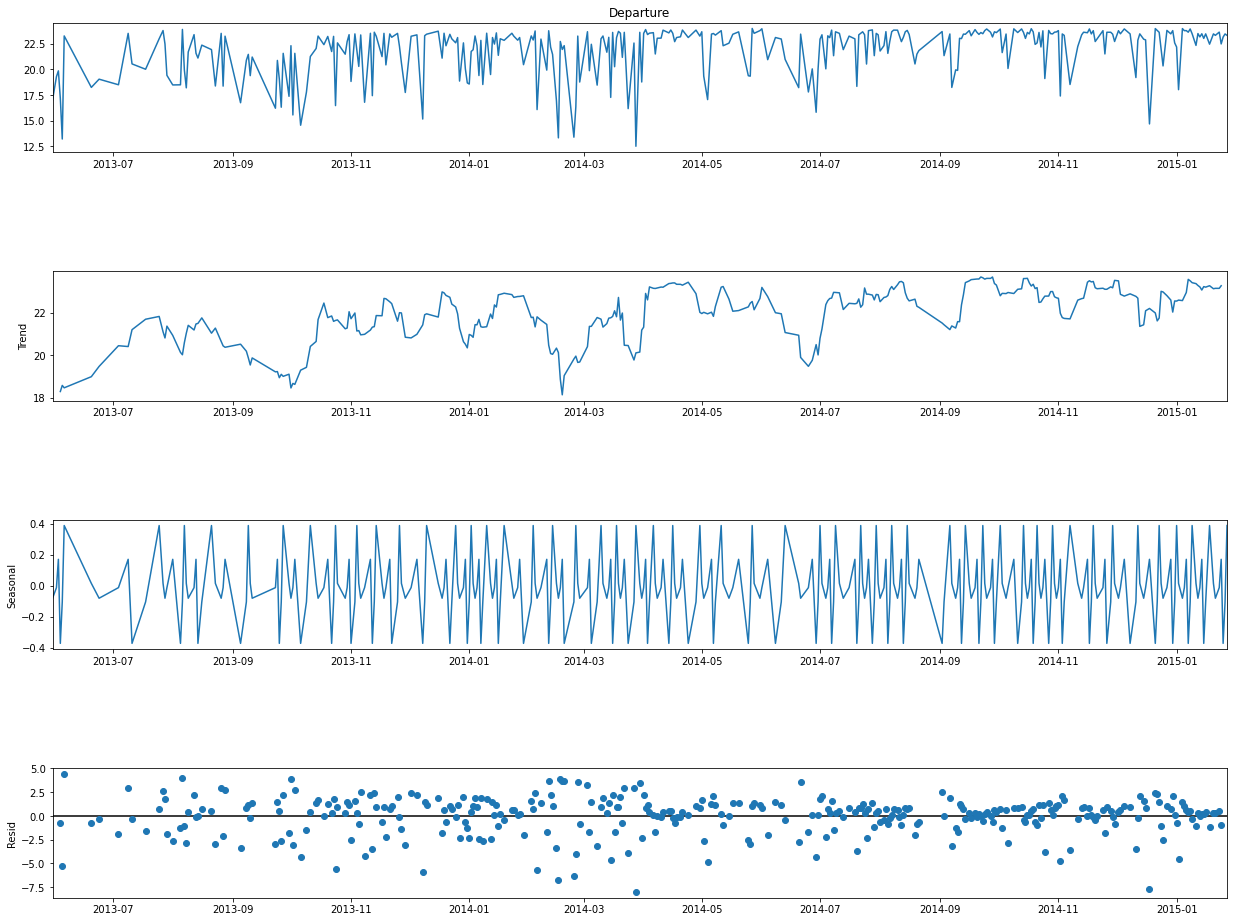

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultD = seasonal_decompose(tsD['Departure'], model='additive',period=7) ### 마찬가지로 7일 단위

fig = plt.figure()
fig = resultD.plot()
fig.set_size_inches(20, 15)

In [9]:
### 차분할 필요는 없을 것 같다는 걸 보이기 위함
"""
tsA_diff = tsA - tsA.shift()
fig = plt.figure(figsize=(20,8))
# plt.plot(ts_diff)

ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)
"""

'\ntsA_diff = tsA - tsA.shift()\nfig = plt.figure(figsize=(20,8))\n# plt.plot(ts_diff)\n\nax3 = fig.add_subplot(211)\nfig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)\nax4 = fig.add_subplot(212)\nfig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)\n'

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


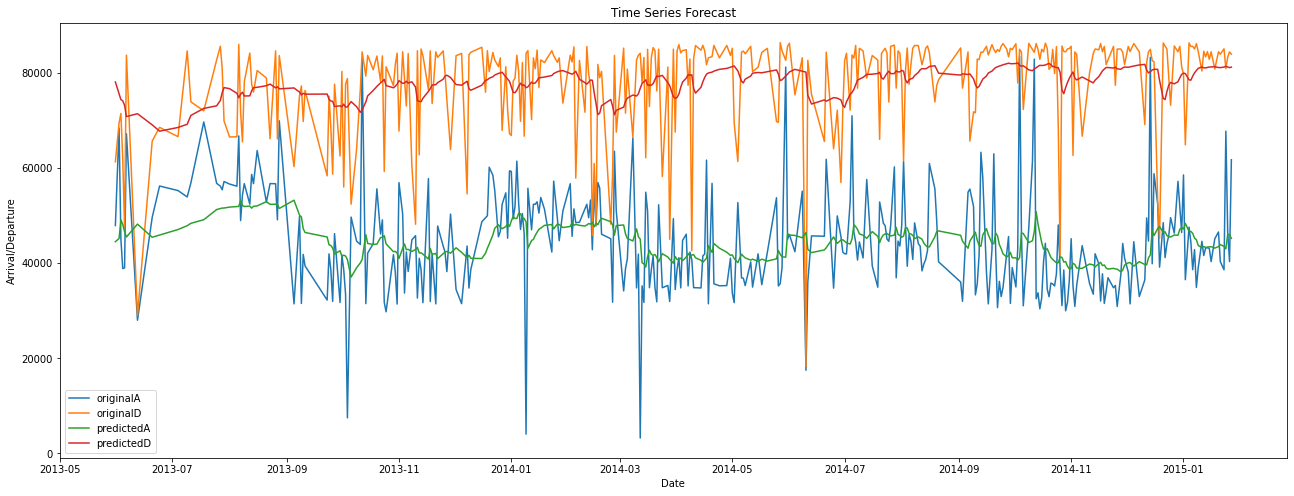

In [9]:
### 결과 ARIMA로 빨리 보고 싶으면 이걸로 보는 게 나음
"""
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

#fit model
modelA = ARIMA(tsA, order=(1,0,2))
modelA_fit = modelA.fit()
modelD = ARIMA(tsD, order=(1,0,2))
modelD_fit = modelD.fit()

#predict
forecastA = modelA_fit.predict(typ='levels')
forecastD = modelD_fit.predict(typ='levels')

#visualization
plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")

plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.legend()
plt.show()
"""

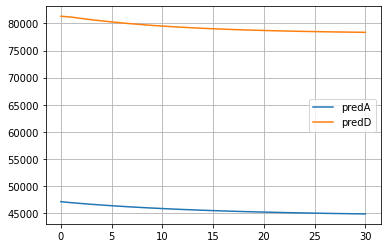

In [10]:
### ARIMA랑 SARIMA랑 forecast 조금 다름. 이건 ARIMA
"""
foreA = modelA_fit.forecast(steps=31)
foreD = modelD_fit.forecast(steps=31)
predA = foreA[0].tolist()
predD = foreD[0].tolist()
plt.plot(predA, label = "predA")
plt.plot(predD, label = "predD")
plt.legend()
plt.grid()
"""

In [82]:
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

### SARIMA에 파라미터 넣어서 최선의 모델 구함
### d=0으로 놓고 돌리면 243번 밖에 계산 안 할 것임. 지금은 721번 돌아감

# Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 3)

p = q = range(0,4)
d = range(0,2)
m = (4,7,12)

cnt = 1

import itertools
import warnings

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, m))
# pdq = [[0,0,0],[0,0,1],[0,0,2],[1,0,0],[1,0,1],[1,0,2],[2,0,0],[2,0,1],[2,0,2]]

# Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]

warnings.filterwarnings("ignore") # specify to ignore warning messages

opt_aic = 10000
opt_param = []
opt_param_seasonal = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tsA,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{} - AIC:{} - cnt:{}'.format(param, param_seasonal, results.aic, cnt))
            
            cnt = cnt + 1
            
            if opt_aic > results.aic:
                opt_aic = results.aic
                opt_param = param
                opt_param_seasonal = param_seasonal
            
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 4) - AIC:8848.082435532682 - cnt:1
SARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:8848.082435532682 - cnt:2
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:8848.082435532682 - cnt:3
SARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC:8535.000704979524 - cnt:4
SARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:8456.667069272722 - cnt:5
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:8344.11878237224 - cnt:6
SARIMA(0, 0, 0)x(0, 0, 2, 4) - AIC:8383.605689483604 - cnt:7
SARIMA(0, 0, 0)x(0, 0, 2, 7) - AIC:8240.747411542388 - cnt:8
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:8001.01129698638 - cnt:9
SARIMA(0, 0, 0)x(0, 0, 3, 4) - AIC:8267.466005255788 - cnt:10
SARIMA(0, 0, 0)x(0, 0, 3, 7) - AIC:8054.727462763921 - cnt:11
SARIMA(0, 0, 0)x(0, 0, 3, 12) - AIC:7705.34567955378 - cnt:12
SARIMA(0, 0, 0)x(0, 1, 0, 4) - AIC:7891.620325389471 - cnt:13
SARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:7827.515121378614 - cnt:14
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:7726.906339687175 - cnt:15
SARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC:7685.4094548922985 - cnt:16
SARIMA(0, 0, 0

SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:7420.65280005945 - cnt:135
SARIMA(0, 0, 1)x(1, 1, 1, 4) - AIC:7680.130582992764 - cnt:136
SARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:7547.775990796565 - cnt:137
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:7341.9365686199835 - cnt:138
SARIMA(0, 0, 1)x(1, 1, 2, 4) - AIC:7583.906188155666 - cnt:139
SARIMA(0, 0, 1)x(1, 1, 2, 7) - AIC:7384.915168391201 - cnt:140
SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:7067.955372154272 - cnt:141
SARIMA(0, 0, 1)x(1, 1, 3, 4) - AIC:7494.1270515254655 - cnt:142
SARIMA(0, 0, 1)x(1, 1, 3, 7) - AIC:7225.66998027229 - cnt:143
SARIMA(0, 0, 1)x(1, 1, 3, 12) - AIC:6812.394869567584 - cnt:144
SARIMA(0, 0, 1)x(2, 0, 0, 4) - AIC:8350.027272643862 - cnt:145
SARIMA(0, 0, 1)x(2, 0, 0, 7) - AIC:8208.711576510554 - cnt:146
SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:7407.814509010376 - cnt:147
SARIMA(0, 0, 1)x(2, 0, 1, 4) - AIC:8347.952516954701 - cnt:148
SARIMA(0, 0, 1)x(2, 0, 1, 7) - AIC:8207.694731182515 - cnt:149
SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:7974.781845921

SARIMA(0, 0, 2)x(3, 0, 0, 7) - AIC:8046.984425845379 - cnt:266
SARIMA(0, 0, 2)x(3, 0, 0, 12) - AIC:7698.1165829472775 - cnt:267
SARIMA(0, 0, 2)x(3, 0, 1, 4) - AIC:8257.771201721305 - cnt:268
SARIMA(0, 0, 2)x(3, 0, 1, 7) - AIC:8047.497331018422 - cnt:269
SARIMA(0, 0, 2)x(3, 0, 1, 12) - AIC:7697.347551463547 - cnt:270
SARIMA(0, 0, 2)x(3, 0, 2, 4) - AIC:8259.697273941205 - cnt:271
SARIMA(0, 0, 2)x(3, 0, 2, 7) - AIC:8049.33672957304 - cnt:272
SARIMA(0, 0, 2)x(3, 0, 2, 12) - AIC:7699.256293720748 - cnt:273
SARIMA(0, 0, 2)x(3, 0, 3, 4) - AIC:8190.979623138381 - cnt:274
SARIMA(0, 0, 2)x(3, 0, 3, 7) - AIC:7981.101756863459 - cnt:275
SARIMA(0, 0, 2)x(3, 0, 3, 12) - AIC:7631.162723282229 - cnt:276
SARIMA(0, 0, 2)x(3, 1, 0, 4) - AIC:7541.663986844062 - cnt:277
SARIMA(0, 0, 2)x(3, 1, 0, 7) - AIC:7290.49760720387 - cnt:278
SARIMA(0, 0, 2)x(3, 1, 0, 12) - AIC:6858.9902899817735 - cnt:279
SARIMA(0, 0, 2)x(3, 1, 1, 4) - AIC:7534.053696481691 - cnt:280
SARIMA(0, 0, 2)x(3, 1, 1, 7) - AIC:7269.3346100740

SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7161.248680052484 - cnt:396
SARIMA(0, 1, 0)x(0, 1, 0, 4) - AIC:8102.043761318925 - cnt:397
SARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:8005.856697110252 - cnt:398
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:7908.650239375254 - cnt:399
SARIMA(0, 1, 0)x(0, 1, 1, 4) - AIC:7829.293532158761 - cnt:400
SARIMA(0, 1, 0)x(0, 1, 1, 7) - AIC:7671.08652560862 - cnt:401
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:7471.49300546296 - cnt:402
SARIMA(0, 1, 0)x(0, 1, 2, 4) - AIC:7744.316953898069 - cnt:403
SARIMA(0, 1, 0)x(0, 1, 2, 7) - AIC:7517.464802655788 - cnt:404
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:7205.380798983916 - cnt:405
SARIMA(0, 1, 0)x(0, 1, 3, 4) - AIC:7649.18740780545 - cnt:406
SARIMA(0, 1, 0)x(0, 1, 3, 7) - AIC:7366.350185369358 - cnt:407
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:6937.193610841882 - cnt:408
SARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:7882.1163773644885 - cnt:409
SARIMA(0, 1, 0)x(1, 0, 0, 7) - AIC:7802.355175192812 - cnt:410
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:7698.32240756630

SARIMA(0, 1, 1)x(1, 1, 3, 4) - AIC:7529.175289461458 - cnt:526
SARIMA(0, 1, 1)x(1, 1, 3, 7) - AIC:7238.7225063200885 - cnt:527
SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:6783.565031959946 - cnt:528
SARIMA(0, 1, 1)x(2, 0, 0, 4) - AIC:7595.979970024418 - cnt:529
SARIMA(0, 1, 1)x(2, 0, 0, 7) - AIC:7472.883759164402 - cnt:530
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:7266.217271341207 - cnt:531
SARIMA(0, 1, 1)x(2, 0, 1, 4) - AIC:7598.0600995162895 - cnt:532
SARIMA(0, 1, 1)x(2, 0, 1, 7) - AIC:7474.152579864742 - cnt:533
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:7268.201831956905 - cnt:534
SARIMA(0, 1, 1)x(2, 0, 2, 4) - AIC:7555.630415164001 - cnt:535
SARIMA(0, 1, 1)x(2, 0, 2, 7) - AIC:7434.712013859005 - cnt:536
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:7222.712906296631 - cnt:537
SARIMA(0, 1, 1)x(2, 0, 3, 4) - AIC:7468.329062797278 - cnt:538
SARIMA(0, 1, 1)x(2, 0, 3, 7) - AIC:7286.1409324031965 - cnt:539
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:6960.468100138956 - cnt:540
SARIMA(0, 1, 1)x(2, 1, 0, 4) - AIC:7684.5077715

SARIMA(0, 1, 2)x(3, 0, 2, 7) - AIC:7327.821207109634 - cnt:656
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:6999.649310628694 - cnt:657
SARIMA(0, 1, 2)x(3, 0, 3, 4) - AIC:7442.632398594531 - cnt:658
SARIMA(0, 1, 2)x(3, 0, 3, 7) - AIC:7265.35990752219 - cnt:659
SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:6938.882290320773 - cnt:660
SARIMA(0, 1, 2)x(3, 1, 0, 4) - AIC:7579.567144140578 - cnt:661
SARIMA(0, 1, 2)x(3, 1, 0, 7) - AIC:7294.567087469469 - cnt:662
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:6841.800305260573 - cnt:663
SARIMA(0, 1, 2)x(3, 1, 1, 4) - AIC:7571.322438414614 - cnt:664
SARIMA(0, 1, 2)x(3, 1, 1, 7) - AIC:7275.310644371464 - cnt:665
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:6821.882151695538 - cnt:666
SARIMA(0, 1, 2)x(3, 1, 2, 4) - AIC:7572.245324472126 - cnt:667
SARIMA(0, 1, 2)x(3, 1, 2, 7) - AIC:7274.536873785566 - cnt:668
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:6822.188551494424 - cnt:669
SARIMA(0, 1, 2)x(3, 1, 3, 4) - AIC:7502.1349348670365 - cnt:670
SARIMA(0, 1, 2)x(3, 1, 3, 7) - AIC:7212.0019088578

SARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:7360.402724414622 - cnt:786
SARIMA(1, 0, 0)x(0, 1, 2, 4) - AIC:7604.328415033961 - cnt:787
SARIMA(1, 0, 0)x(0, 1, 2, 7) - AIC:7405.086804140026 - cnt:788
SARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:7086.427988026943 - cnt:789
SARIMA(1, 0, 0)x(0, 1, 3, 4) - AIC:7513.449156478376 - cnt:790
SARIMA(1, 0, 0)x(0, 1, 3, 7) - AIC:7246.44222302657 - cnt:791
SARIMA(1, 0, 0)x(0, 1, 3, 12) - AIC:6830.39199318648 - cnt:792
SARIMA(1, 0, 0)x(1, 0, 0, 4) - AIC:7876.1840699811055 - cnt:793
SARIMA(1, 0, 0)x(1, 0, 0, 7) - AIC:7795.878669667536 - cnt:794
SARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:7691.612623502642 - cnt:795
SARIMA(1, 0, 0)x(1, 0, 1, 4) - AIC:7793.907178280631 - cnt:796
SARIMA(1, 0, 0)x(1, 0, 1, 7) - AIC:7737.878872006366 - cnt:797
SARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:7648.500393159225 - cnt:798
SARIMA(1, 0, 0)x(1, 0, 2, 4) - AIC:7696.501830320981 - cnt:799
SARIMA(1, 0, 0)x(1, 0, 2, 7) - AIC:7564.3977815079415 - cnt:800
SARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:7357.499271577

SARIMA(1, 0, 1)x(2, 0, 1, 4) - AIC:7647.641787298178 - cnt:916
SARIMA(1, 0, 1)x(2, 0, 1, 7) - AIC:7513.499454610852 - cnt:917
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:7271.017687580341 - cnt:918
SARIMA(1, 0, 1)x(2, 0, 2, 4) - AIC:7613.586702317561 - cnt:919
SARIMA(1, 0, 1)x(2, 0, 2, 7) - AIC:7479.638099709298 - cnt:920
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:7264.424402544662 - cnt:921
SARIMA(1, 0, 1)x(2, 0, 3, 4) - AIC:7499.946462189024 - cnt:922
SARIMA(1, 0, 1)x(2, 0, 3, 7) - AIC:7333.911060545762 - cnt:923
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:7006.389092695005 - cnt:924
SARIMA(1, 0, 1)x(2, 1, 0, 4) - AIC:7615.257767472093 - cnt:925
SARIMA(1, 0, 1)x(2, 1, 0, 7) - AIC:7423.353555765927 - cnt:926
SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:7112.520137827918 - cnt:927
SARIMA(1, 0, 1)x(2, 1, 1, 4) - AIC:7590.177223775406 - cnt:928
SARIMA(1, 0, 1)x(2, 1, 1, 7) - AIC:7391.469649057319 - cnt:929
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:7074.090831207577 - cnt:930
SARIMA(1, 0, 1)x(2, 1, 2, 4) - AIC:7568.9654947202

SARIMA(1, 0, 2)x(3, 1, 0, 4) - AIC:7522.748715342547 - cnt:1045
SARIMA(1, 0, 2)x(3, 1, 0, 7) - AIC:7277.94404094721 - cnt:1046
SARIMA(1, 0, 2)x(3, 1, 0, 12) - AIC:6829.116134159036 - cnt:1047
SARIMA(1, 0, 2)x(3, 1, 1, 4) - AIC:7506.724657623783 - cnt:1048
SARIMA(1, 0, 2)x(3, 1, 1, 7) - AIC:7277.346546459976 - cnt:1049
SARIMA(1, 0, 2)x(3, 1, 1, 12) - AIC:6812.8788019967 - cnt:1050
SARIMA(1, 0, 2)x(3, 1, 2, 4) - AIC:7505.44882420909 - cnt:1051
SARIMA(1, 0, 2)x(3, 1, 2, 7) - AIC:7275.624774538976 - cnt:1052
SARIMA(1, 0, 2)x(3, 1, 2, 12) - AIC:6811.418694470743 - cnt:1053
SARIMA(1, 0, 2)x(3, 1, 3, 4) - AIC:7457.080963354878 - cnt:1054
SARIMA(1, 0, 2)x(3, 1, 3, 7) - AIC:7228.242819503979 - cnt:1055
SARIMA(1, 0, 2)x(3, 1, 3, 12) - AIC:6760.53570624867 - cnt:1056
SARIMA(1, 0, 3)x(0, 0, 0, 4) - AIC:7710.081641887905 - cnt:1057
SARIMA(1, 0, 3)x(0, 0, 0, 7) - AIC:7710.081641887905 - cnt:1058
SARIMA(1, 0, 3)x(0, 0, 0, 12) - AIC:7710.081641887905 - cnt:1059
SARIMA(1, 0, 3)x(0, 0, 1, 4) - AIC:7621.

SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:7142.504470332669 - cnt:1173
SARIMA(1, 1, 0)x(0, 1, 3, 4) - AIC:7597.719757938202 - cnt:1174
SARIMA(1, 1, 0)x(0, 1, 3, 7) - AIC:7329.139377561016 - cnt:1175
SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:6881.79921989954 - cnt:1176
SARIMA(1, 1, 0)x(1, 0, 0, 4) - AIC:7760.687905861588 - cnt:1177
SARIMA(1, 1, 0)x(1, 0, 0, 7) - AIC:7692.247743124577 - cnt:1178
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:7585.494733766844 - cnt:1179
SARIMA(1, 1, 0)x(1, 0, 1, 4) - AIC:7760.660605238279 - cnt:1180
SARIMA(1, 1, 0)x(1, 0, 1, 7) - AIC:7694.222601650194 - cnt:1181
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:7587.451251777376 - cnt:1182
SARIMA(1, 1, 0)x(1, 0, 2, 4) - AIC:7667.7382255369885 - cnt:1183
SARIMA(1, 1, 0)x(1, 0, 2, 7) - AIC:7548.26334168176 - cnt:1184
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:7339.259307558483 - cnt:1185
SARIMA(1, 1, 0)x(1, 0, 3, 4) - AIC:7585.274162165835 - cnt:1186
SARIMA(1, 1, 0)x(1, 0, 3, 7) - AIC:7401.475404203777 - cnt:1187
SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:

SARIMA(1, 1, 1)x(2, 0, 1, 7) - AIC:7455.334366377321 - cnt:1301
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:7246.834101756114 - cnt:1302
SARIMA(1, 1, 1)x(2, 0, 2, 4) - AIC:7557.4947716958395 - cnt:1303
SARIMA(1, 1, 1)x(2, 0, 2, 7) - AIC:7436.346214260429 - cnt:1304
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:7224.293623474427 - cnt:1305
SARIMA(1, 1, 1)x(2, 0, 3, 4) - AIC:7470.278747003595 - cnt:1306
SARIMA(1, 1, 1)x(2, 0, 3, 7) - AIC:7287.362586273383 - cnt:1307
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:6962.260622711817 - cnt:1308
SARIMA(1, 1, 1)x(2, 1, 0, 4) - AIC:7659.773202026181 - cnt:1309
SARIMA(1, 1, 1)x(2, 1, 0, 7) - AIC:7439.291667075875 - cnt:1310
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:7110.214526448628 - cnt:1311
SARIMA(1, 1, 1)x(2, 1, 1, 4) - AIC:7645.741951036218 - cnt:1312
SARIMA(1, 1, 1)x(2, 1, 1, 7) - AIC:7417.965619721635 - cnt:1313
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:7076.6027955352265 - cnt:1314
SARIMA(1, 1, 1)x(2, 1, 2, 4) - AIC:7624.776518873043 - cnt:1315
SARIMA(1, 1, 1)x(2, 1, 2, 7) - AI

SARIMA(1, 1, 2)x(3, 1, 0, 4) - AIC:7548.451604009926 - cnt:1429
SARIMA(1, 1, 2)x(3, 1, 0, 7) - AIC:7257.294087981904 - cnt:1430
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:6820.848150951707 - cnt:1431
SARIMA(1, 1, 2)x(3, 1, 1, 4) - AIC:7520.843037609831 - cnt:1432
SARIMA(1, 1, 2)x(3, 1, 1, 7) - AIC:7235.6351944302205 - cnt:1433
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:6800.281999482719 - cnt:1434
SARIMA(1, 1, 2)x(3, 1, 2, 4) - AIC:7540.181488449466 - cnt:1435
SARIMA(1, 1, 2)x(3, 1, 2, 7) - AIC:7236.262081767787 - cnt:1436
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:6799.135281489807 - cnt:1437
SARIMA(1, 1, 2)x(3, 1, 3, 4) - AIC:7493.803739595054 - cnt:1438
SARIMA(1, 1, 2)x(3, 1, 3, 7) - AIC:7190.887672255728 - cnt:1439
SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:6748.400533836471 - cnt:1440
SARIMA(1, 1, 3)x(0, 0, 0, 4) - AIC:7687.475631152349 - cnt:1441
SARIMA(1, 1, 3)x(0, 0, 0, 7) - AIC:7687.475631152349 - cnt:1442
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:7687.475631152349 - cnt:1443
SARIMA(1, 1, 3)x(0, 0, 1, 4) - AIC

SARIMA(2, 0, 0)x(0, 1, 2, 12) - AIC:7084.753861393183 - cnt:1557
SARIMA(2, 0, 0)x(0, 1, 3, 4) - AIC:7513.591366376696 - cnt:1558
SARIMA(2, 0, 0)x(0, 1, 3, 7) - AIC:7247.099235244302 - cnt:1559
SARIMA(2, 0, 0)x(0, 1, 3, 12) - AIC:6828.364048906435 - cnt:1560
SARIMA(2, 0, 0)x(1, 0, 0, 4) - AIC:7759.853116099148 - cnt:1561
SARIMA(2, 0, 0)x(1, 0, 0, 7) - AIC:7691.41607157322 - cnt:1562
SARIMA(2, 0, 0)x(1, 0, 0, 12) - AIC:7584.121647554174 - cnt:1563
SARIMA(2, 0, 0)x(1, 0, 1, 4) - AIC:7740.072783833199 - cnt:1564
SARIMA(2, 0, 0)x(1, 0, 1, 7) - AIC:7691.824703684613 - cnt:1565
SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:7585.992515081821 - cnt:1566
SARIMA(2, 0, 0)x(1, 0, 2, 4) - AIC:7674.408125364229 - cnt:1567
SARIMA(2, 0, 0)x(1, 0, 2, 7) - AIC:7543.533147127846 - cnt:1568
SARIMA(2, 0, 0)x(1, 0, 2, 12) - AIC:7357.191900726677 - cnt:1569
SARIMA(2, 0, 0)x(1, 0, 3, 4) - AIC:7577.412543892075 - cnt:1570
SARIMA(2, 0, 0)x(1, 0, 3, 7) - AIC:7382.725406497365 - cnt:1571
SARIMA(2, 0, 0)x(1, 0, 3, 12) - AIC:

SARIMA(2, 0, 1)x(2, 0, 1, 7) - AIC:7493.719588665965 - cnt:1685
SARIMA(2, 0, 1)x(2, 0, 1, 12) - AIC:7253.454839084646 - cnt:1686
SARIMA(2, 0, 1)x(2, 0, 2, 4) - AIC:7615.557991773799 - cnt:1687
SARIMA(2, 0, 1)x(2, 0, 2, 7) - AIC:7481.4467680779035 - cnt:1688
SARIMA(2, 0, 1)x(2, 0, 2, 12) - AIC:7251.05200629655 - cnt:1689
SARIMA(2, 0, 1)x(2, 0, 3, 4) - AIC:7532.065174083362 - cnt:1690
SARIMA(2, 0, 1)x(2, 0, 3, 7) - AIC:7335.8489441660095 - cnt:1691
SARIMA(2, 0, 1)x(2, 0, 3, 12) - AIC:7008.353849653589 - cnt:1692
SARIMA(2, 0, 1)x(2, 1, 0, 4) - AIC:7595.185696796024 - cnt:1693
SARIMA(2, 0, 1)x(2, 1, 0, 7) - AIC:7403.602940761921 - cnt:1694
SARIMA(2, 0, 1)x(2, 1, 0, 12) - AIC:7088.886948260345 - cnt:1695
SARIMA(2, 0, 1)x(2, 1, 1, 4) - AIC:7601.045977320373 - cnt:1696
SARIMA(2, 0, 1)x(2, 1, 1, 7) - AIC:7372.526870400199 - cnt:1697
SARIMA(2, 0, 1)x(2, 1, 1, 12) - AIC:7052.026497132745 - cnt:1698
SARIMA(2, 0, 1)x(2, 1, 2, 4) - AIC:7570.204476601756 - cnt:1699
SARIMA(2, 0, 1)x(2, 1, 2, 7) - AIC

SARIMA(2, 0, 2)x(3, 1, 0, 4) - AIC:7494.345576675691 - cnt:1813
SARIMA(2, 0, 2)x(3, 1, 0, 7) - AIC:7248.331076167438 - cnt:1814
SARIMA(2, 0, 2)x(3, 1, 0, 12) - AIC:6808.930146323877 - cnt:1815
SARIMA(2, 0, 2)x(3, 1, 1, 4) - AIC:7486.902366579698 - cnt:1816
SARIMA(2, 0, 2)x(3, 1, 1, 7) - AIC:7222.714361619968 - cnt:1817
SARIMA(2, 0, 2)x(3, 1, 1, 12) - AIC:6791.837188381529 - cnt:1818
SARIMA(2, 0, 2)x(3, 1, 2, 4) - AIC:7485.3493859090795 - cnt:1819
SARIMA(2, 0, 2)x(3, 1, 2, 7) - AIC:7221.870920274243 - cnt:1820
SARIMA(2, 0, 2)x(3, 1, 2, 12) - AIC:6789.48290403728 - cnt:1821
SARIMA(2, 0, 2)x(3, 1, 3, 4) - AIC:7458.615116895159 - cnt:1822
SARIMA(2, 0, 2)x(3, 1, 3, 7) - AIC:7199.250616952275 - cnt:1823
SARIMA(2, 0, 2)x(3, 1, 3, 12) - AIC:6761.861283438991 - cnt:1824
SARIMA(2, 0, 3)x(0, 0, 0, 4) - AIC:7711.349486905965 - cnt:1825
SARIMA(2, 0, 3)x(0, 0, 0, 7) - AIC:7711.349486905965 - cnt:1826
SARIMA(2, 0, 3)x(0, 0, 0, 12) - AIC:7711.349486905965 - cnt:1827
SARIMA(2, 0, 3)x(0, 0, 1, 4) - AIC:

SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:7119.0376722878855 - cnt:1941
SARIMA(2, 1, 0)x(0, 1, 3, 4) - AIC:7572.0601378008405 - cnt:1942
SARIMA(2, 1, 0)x(0, 1, 3, 7) - AIC:7300.449729413417 - cnt:1943
SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:6860.539945739453 - cnt:1944
SARIMA(2, 1, 0)x(1, 0, 0, 4) - AIC:7707.887862581092 - cnt:1945
SARIMA(2, 1, 0)x(1, 0, 0, 7) - AIC:7644.806603437901 - cnt:1946
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:7538.8278398691955 - cnt:1947
SARIMA(2, 1, 0)x(1, 0, 1, 4) - AIC:7710.047011794399 - cnt:1948
SARIMA(2, 1, 0)x(1, 0, 1, 7) - AIC:7646.239026875264 - cnt:1949
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:7540.826651861771 - cnt:1950
SARIMA(2, 1, 0)x(1, 0, 2, 4) - AIC:7639.019037570702 - cnt:1951
SARIMA(2, 1, 0)x(1, 0, 2, 7) - AIC:7521.542999310038 - cnt:1952
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:7314.818025868661 - cnt:1953
SARIMA(2, 1, 0)x(1, 0, 3, 4) - AIC:7557.4270235110225 - cnt:1954
SARIMA(2, 1, 0)x(1, 0, 3, 7) - AIC:7375.513904949361 - cnt:1955
SARIMA(2, 1, 0)x(1, 0, 3, 12) -

SARIMA(2, 1, 1)x(2, 0, 1, 7) - AIC:7436.525461823928 - cnt:2069
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:7230.069853432611 - cnt:2070
SARIMA(2, 1, 1)x(2, 0, 2, 4) - AIC:7559.141641420008 - cnt:2071
SARIMA(2, 1, 1)x(2, 0, 2, 7) - AIC:7438.034547268409 - cnt:2072
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:7225.992199400175 - cnt:2073
SARIMA(2, 1, 1)x(2, 0, 3, 4) - AIC:7471.965162846999 - cnt:2074
SARIMA(2, 1, 1)x(2, 0, 3, 7) - AIC:7289.027309132416 - cnt:2075
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:6963.9877026535305 - cnt:2076
SARIMA(2, 1, 1)x(2, 1, 0, 4) - AIC:7635.810683355571 - cnt:2077
SARIMA(2, 1, 1)x(2, 1, 0, 7) - AIC:7419.026564013767 - cnt:2078
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:7087.956249165289 - cnt:2079
SARIMA(2, 1, 1)x(2, 1, 1, 4) - AIC:7620.445005863887 - cnt:2080
SARIMA(2, 1, 1)x(2, 1, 1, 7) - AIC:7396.747854403624 - cnt:2081
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:7052.250638209547 - cnt:2082
SARIMA(2, 1, 1)x(2, 1, 2, 4) - AIC:7621.511074465117 - cnt:2083
SARIMA(2, 1, 1)x(2, 1, 2, 7) - AIC

SARIMA(2, 1, 2)x(3, 1, 0, 4) - AIC:7529.033120713574 - cnt:2197
SARIMA(2, 1, 2)x(3, 1, 0, 7) - AIC:7279.859778214422 - cnt:2198
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:6794.6747226223715 - cnt:2199
SARIMA(2, 1, 2)x(3, 1, 1, 4) - AIC:7501.1868526682865 - cnt:2200
SARIMA(2, 1, 2)x(3, 1, 1, 7) - AIC:7232.822647338099 - cnt:2201
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:6773.927687893589 - cnt:2202
SARIMA(2, 1, 2)x(3, 1, 2, 4) - AIC:7501.860256270786 - cnt:2203
SARIMA(2, 1, 2)x(3, 1, 2, 7) - AIC:7231.962011039355 - cnt:2204
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:6773.145727494513 - cnt:2205
SARIMA(2, 1, 2)x(3, 1, 3, 4) - AIC:7495.180820405429 - cnt:2206
SARIMA(2, 1, 2)x(3, 1, 3, 7) - AIC:7210.122636717146 - cnt:2207
SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:6748.745450773165 - cnt:2208
SARIMA(2, 1, 3)x(0, 0, 0, 4) - AIC:7689.500806418125 - cnt:2209
SARIMA(2, 1, 3)x(0, 0, 0, 7) - AIC:7689.500806418125 - cnt:2210
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:7689.500806418125 - cnt:2211
SARIMA(2, 1, 3)x(0, 0, 1, 4) - AI

SARIMA(3, 0, 0)x(0, 1, 2, 12) - AIC:7086.558239514812 - cnt:2325
SARIMA(3, 0, 0)x(0, 1, 3, 4) - AIC:7514.217469191788 - cnt:2326
SARIMA(3, 0, 0)x(0, 1, 3, 7) - AIC:7248.526806673685 - cnt:2327
SARIMA(3, 0, 0)x(0, 1, 3, 12) - AIC:6830.2395679617475 - cnt:2328
SARIMA(3, 0, 0)x(1, 0, 0, 4) - AIC:7708.582915838211 - cnt:2329
SARIMA(3, 0, 0)x(1, 0, 0, 7) - AIC:7645.0856818441 - cnt:2330
SARIMA(3, 0, 0)x(1, 0, 0, 12) - AIC:7538.858362452563 - cnt:2331
SARIMA(3, 0, 0)x(1, 0, 1, 4) - AIC:7716.427752571365 - cnt:2332
SARIMA(3, 0, 0)x(1, 0, 1, 7) - AIC:7660.2626027060305 - cnt:2333
SARIMA(3, 0, 0)x(1, 0, 1, 12) - AIC:7540.734872261839 - cnt:2334
SARIMA(3, 0, 0)x(1, 0, 2, 4) - AIC:7662.826011372784 - cnt:2335
SARIMA(3, 0, 0)x(1, 0, 2, 7) - AIC:7538.617457881608 - cnt:2336
SARIMA(3, 0, 0)x(1, 0, 2, 12) - AIC:7334.822600513982 - cnt:2337
SARIMA(3, 0, 0)x(1, 0, 3, 4) - AIC:7574.773260082104 - cnt:2338
SARIMA(3, 0, 0)x(1, 0, 3, 7) - AIC:7379.40547699468 - cnt:2339
SARIMA(3, 0, 0)x(1, 0, 3, 12) - AIC:

SARIMA(3, 0, 1)x(2, 0, 1, 7) - AIC:7442.39325756611 - cnt:2453
SARIMA(3, 0, 1)x(2, 0, 1, 12) - AIC:7235.264321045904 - cnt:2454
SARIMA(3, 0, 1)x(2, 0, 2, 4) - AIC:7564.960033653261 - cnt:2455
SARIMA(3, 0, 1)x(2, 0, 2, 7) - AIC:7462.491693260008 - cnt:2456
SARIMA(3, 0, 1)x(2, 0, 2, 12) - AIC:7231.031319406047 - cnt:2457
SARIMA(3, 0, 1)x(2, 0, 3, 4) - AIC:7503.761555562735 - cnt:2458
SARIMA(3, 0, 1)x(2, 0, 3, 7) - AIC:7337.346865925537 - cnt:2459
SARIMA(3, 0, 1)x(2, 0, 3, 12) - AIC:7010.360695695885 - cnt:2460
SARIMA(3, 0, 1)x(2, 1, 0, 4) - AIC:7575.298084060622 - cnt:2461
SARIMA(3, 0, 1)x(2, 1, 0, 7) - AIC:7384.456107750485 - cnt:2462
SARIMA(3, 0, 1)x(2, 1, 0, 12) - AIC:7069.143881743072 - cnt:2463
SARIMA(3, 0, 1)x(2, 1, 1, 4) - AIC:7550.668694644629 - cnt:2464
SARIMA(3, 0, 1)x(2, 1, 1, 7) - AIC:7353.330986140377 - cnt:2465
SARIMA(3, 0, 1)x(2, 1, 1, 12) - AIC:7032.86558386673 - cnt:2466
SARIMA(3, 0, 1)x(2, 1, 2, 4) - AIC:7550.389288396553 - cnt:2467
SARIMA(3, 0, 1)x(2, 1, 2, 7) - AIC:73

SARIMA(3, 0, 2)x(3, 1, 0, 4) - AIC:7470.535909837734 - cnt:2581
SARIMA(3, 0, 2)x(3, 1, 0, 7) - AIC:7219.677417830869 - cnt:2582
SARIMA(3, 0, 2)x(3, 1, 0, 12) - AIC:6797.159373482831 - cnt:2583
SARIMA(3, 0, 2)x(3, 1, 1, 4) - AIC:7466.104996956719 - cnt:2584
SARIMA(3, 0, 2)x(3, 1, 1, 7) - AIC:7203.74610720527 - cnt:2585
SARIMA(3, 0, 2)x(3, 1, 1, 12) - AIC:6761.225107176126 - cnt:2586
SARIMA(3, 0, 2)x(3, 1, 2, 4) - AIC:7463.243003950294 - cnt:2587
SARIMA(3, 0, 2)x(3, 1, 2, 7) - AIC:7202.335787557255 - cnt:2588
SARIMA(3, 0, 2)x(3, 1, 2, 12) - AIC:6761.362489157926 - cnt:2589
SARIMA(3, 0, 2)x(3, 1, 3, 4) - AIC:7459.707520297897 - cnt:2590
SARIMA(3, 0, 2)x(3, 1, 3, 7) - AIC:7200.309750338703 - cnt:2591
SARIMA(3, 0, 2)x(3, 1, 3, 12) - AIC:6762.114834056237 - cnt:2592
SARIMA(3, 0, 3)x(0, 0, 0, 4) - AIC:7712.1985659092525 - cnt:2593
SARIMA(3, 0, 3)x(0, 0, 0, 7) - AIC:7712.1985659092525 - cnt:2594
SARIMA(3, 0, 3)x(0, 0, 0, 12) - AIC:7712.1985659092525 - cnt:2595
SARIMA(3, 0, 3)x(0, 0, 1, 4) - AI

SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:7093.900833255962 - cnt:2709
SARIMA(3, 1, 0)x(0, 1, 3, 4) - AIC:7555.429873752715 - cnt:2710
SARIMA(3, 1, 0)x(0, 1, 3, 7) - AIC:7278.924251673082 - cnt:2711
SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:6836.310081167367 - cnt:2712
SARIMA(3, 1, 0)x(1, 0, 0, 4) - AIC:7645.530211820398 - cnt:2713
SARIMA(3, 1, 0)x(1, 0, 0, 7) - AIC:7600.974647202822 - cnt:2714
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:7494.307407309105 - cnt:2715
SARIMA(3, 1, 0)x(1, 0, 1, 4) - AIC:7622.861144849745 - cnt:2716
SARIMA(3, 1, 0)x(1, 0, 1, 7) - AIC:7602.719330152521 - cnt:2717
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:7496.14969719896 - cnt:2718
SARIMA(3, 1, 0)x(1, 0, 2, 4) - AIC:7580.798055033008 - cnt:2719
SARIMA(3, 1, 0)x(1, 0, 2, 7) - AIC:7499.973942478698 - cnt:2720
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:7288.648179822354 - cnt:2721
SARIMA(3, 1, 0)x(1, 0, 3, 4) - AIC:7494.547406897756 - cnt:2722
SARIMA(3, 1, 0)x(1, 0, 3, 7) - AIC:7355.225920080948 - cnt:2723
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:

SARIMA(3, 1, 1)x(2, 0, 1, 7) - AIC:7417.155177128341 - cnt:2837
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:7210.419717253957 - cnt:2838
SARIMA(3, 1, 1)x(2, 0, 2, 4) - AIC:7533.183272300974 - cnt:2839
SARIMA(3, 1, 1)x(2, 0, 2, 7) - AIC:7418.799827514968 - cnt:2840
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:7206.660752996831 - cnt:2841
SARIMA(3, 1, 1)x(2, 0, 3, 4) - AIC:7471.9421124527125 - cnt:2842
SARIMA(3, 1, 1)x(2, 0, 3, 7) - AIC:7290.268586512611 - cnt:2843
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:6968.650094955562 - cnt:2844
SARIMA(3, 1, 1)x(2, 1, 0, 4) - AIC:7615.443499343162 - cnt:2845
SARIMA(3, 1, 1)x(2, 1, 0, 7) - AIC:7398.229970518091 - cnt:2846
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:7065.969952157216 - cnt:2847
SARIMA(3, 1, 1)x(2, 1, 1, 4) - AIC:7597.203463629803 - cnt:2848
SARIMA(3, 1, 1)x(2, 1, 1, 7) - AIC:7375.624163386274 - cnt:2849
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:7031.659107653655 - cnt:2850
SARIMA(3, 1, 1)x(2, 1, 2, 4) - AIC:7598.4820277331155 - cnt:2851
SARIMA(3, 1, 1)x(2, 1, 2, 7) - AI

SARIMA(3, 1, 2)x(3, 1, 0, 4) - AIC:7493.855450810366 - cnt:2965
SARIMA(3, 1, 2)x(3, 1, 0, 7) - AIC:7239.273977391311 - cnt:2966
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:6770.045065158282 - cnt:2967
SARIMA(3, 1, 2)x(3, 1, 1, 4) - AIC:7462.575049367196 - cnt:2968
SARIMA(3, 1, 2)x(3, 1, 1, 7) - AIC:7211.237837705372 - cnt:2969
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:6751.337958985111 - cnt:2970
SARIMA(3, 1, 2)x(3, 1, 2, 4) - AIC:7479.573321397172 - cnt:2971
SARIMA(3, 1, 2)x(3, 1, 2, 7) - AIC:7191.907402111086 - cnt:2972
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:6751.290556139453 - cnt:2973
SARIMA(3, 1, 2)x(3, 1, 3, 4) - AIC:7459.1558149086495 - cnt:2974
SARIMA(3, 1, 2)x(3, 1, 3, 7) - AIC:7208.037389806215 - cnt:2975
SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:6750.259430384648 - cnt:2976
SARIMA(3, 1, 3)x(0, 0, 0, 4) - AIC:7691.068993489047 - cnt:2977
SARIMA(3, 1, 3)x(0, 0, 0, 7) - AIC:7691.068993489047 - cnt:2978
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:7691.068993489047 - cnt:2979
SARIMA(3, 1, 3)x(0, 0, 1, 4) - AIC

In [83]:
print(opt_param, opt_param_seasonal, results.aic)
# SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:6731.207845505058 - cnt:3072

(1, 1, 3) (2, 1, 3, 12) 6731.207845505058


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581:

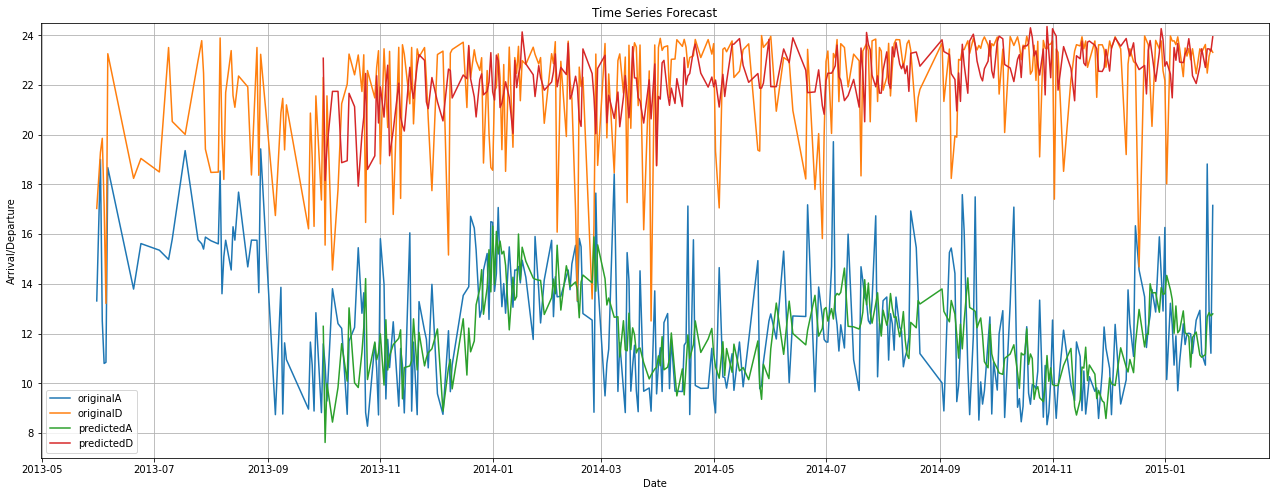

In [8]:
import statsmodels.api as sm
from datetime import datetime

### 예전 거 돌려보니까 (opt_param, opt_param_seasonal) = (1, 1, 3) (2, 1, 3, 12) 6731.207845505058
### 이것도 AIC 같음 SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:6731.207845505058 - cnt:3072

# modelA = sm.tsa.statespace.SARIMAX(tsA, order=opt_param, seasonal_order=opt_param_seasonal)
# modelD = sm.tsa.statespace.SARIMAX(tsD, order=opt_param, seasonal_order=opt_param_seasonal)

modelA = sm.tsa.statespace.SARIMAX(tsA, order=(1, 1, 3), seasonal_order=(2, 1, 3, 12))
modelD = sm.tsa.statespace.SARIMAX(tsD, order=(1, 1, 3), seasonal_order=(2, 1, 3, 12))

modelA_fit = modelA.fit()
modelD_fit = modelD.fit()
forecastA = modelA_fit.predict(start='2013-10-01',typ='levels')
forecastD = modelD_fit.predict(start='2013-10-01',typ='levels')

plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")
plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.ylim(7,24.5)
plt.grid()
plt.legend()
plt.show()

In [9]:
print(modelA_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            Arrival   No. Observations:                  349
Model:             SARIMAX(1, 1, 3)x(2, 1, 3, 12)   Log Likelihood                -763.352
Date:                            Wed, 22 Sep 2021   AIC                           1546.703
Time:                                    20:43:14   BIC                           1584.874
Sample:                                         0   HQIC                          1561.919
                                            - 349                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4909      0.294      1.669      0.095      -0.085       1.067
ma.L1         -1.3775      0.295   

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


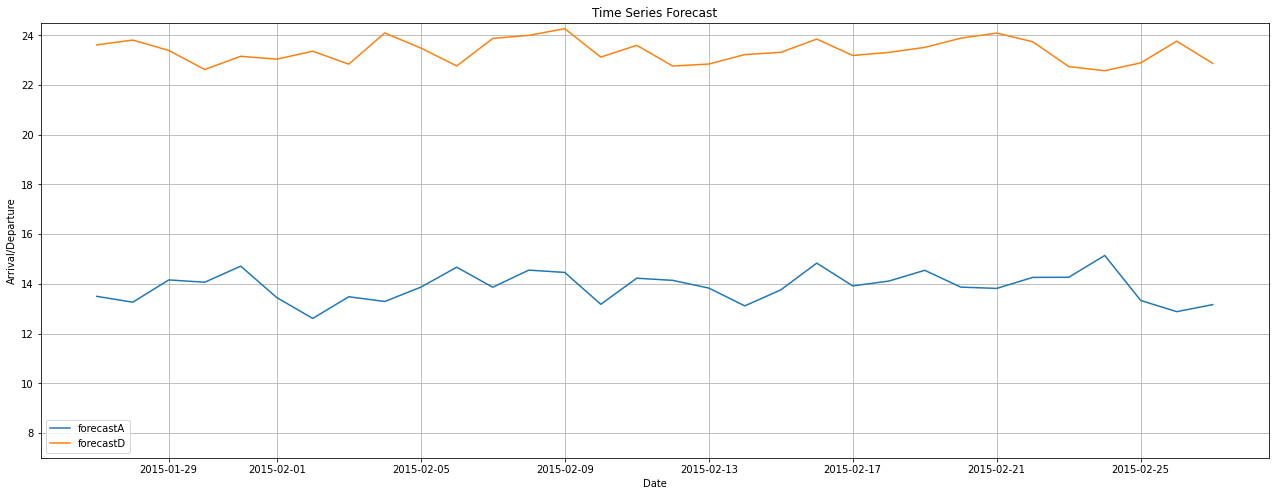

In [10]:
#modelA_fit.plot_diagnostics(figsize=(16, 8))
#modelD_fit.plot_diagnostics(figsize=(16, 8))
#plt.show()
index_future_dates=pd.date_range(start='2015-01-27',end='2015-02-27')
foreA = modelA_fit.predict(start=len(tsA), end=len(tsA)+31,typ='levels')
foreA.index=index_future_dates
foreD = modelD_fit.predict(start=len(tsD), end=len(tsD)+31,typ='levels')
foreD.index=index_future_dates

plt.figure(figsize=(22,8))
plt.plot(foreA, label = "forecastA")
plt.plot(foreD, label = "forecastD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.ylim(7,24.5)
plt.grid()
plt.legend()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
resultA = adfuller(tsA)
print('ADF Statistic: %f' % resultA[0])
print('p-value: %f' % resultA[1])
print('Critical Values:')
for key, value in resultA[4].items():
    print('\t%s: %.3f' % (key,value))

resultD = adfuller(tsD)
print('ADF Statistic: %f' % resultD[0])
print('p-value: %f' % resultD[1])
print('Critical Values:')
for key, value in resultD[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -2.964246
p-value: 0.038371
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
ADF Statistic: -5.683824
p-value: 0.000001
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


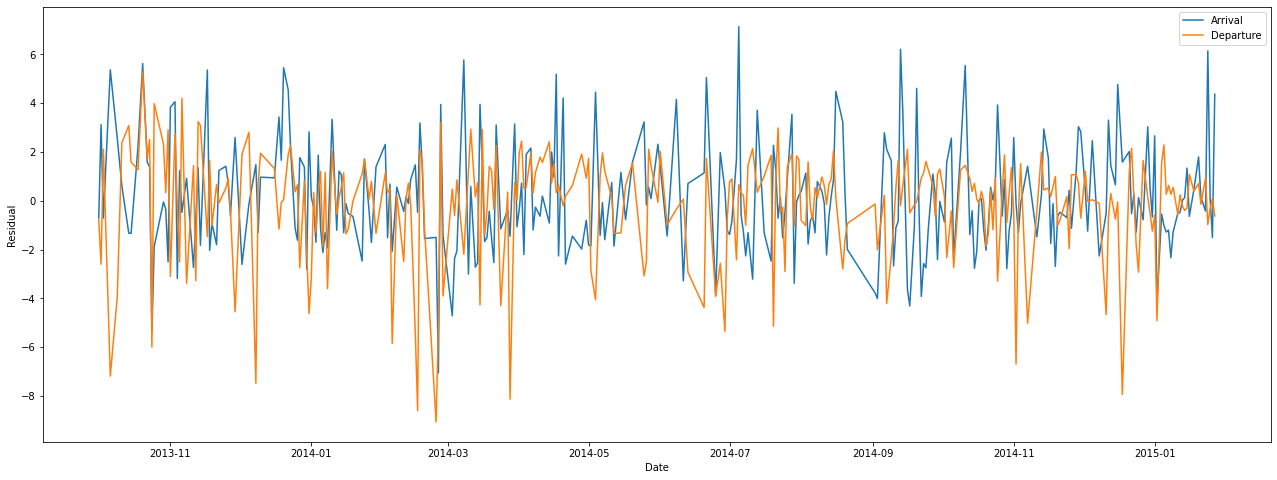

In [12]:
resiA = np.array(ulala[ulala.Date>='2013-10-01'].Arrival)-np.array(forecastA)
resiD = np.array(ulala[ulala.Date>='2013-10-01'].Departure)-np.array(forecastD)

plt.figure(figsize=(22,8))
plt.plot(ulala.Date[ulala.Date>='2013-10-01'],resiA, label='Arrival')
plt.plot(ulala.Date[ulala.Date>='2013-10-01'],resiD, label='Departure')

plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

In [13]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred)*100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1], 3)
    mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred)*100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape}, index=[0])
    return df

In [14]:
scoring(np.array(ulala[ulala.Date>='2013-10-01'].Arrival), np.array(forecastA))

,R2,Corr,RMSE,MAPE
0,9.992,0.413,2.254,14.616


In [15]:
scoring(np.array(ulala[ulala.Date>='2013-10-01'].Departure), np.array(forecastD))

,R2,Corr,RMSE,MAPE
0,-1.815,0.248,2.226,7.888
